In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
vgames = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Video%20Games%20Sales%20Dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')
vgames = vgames.drop(columns=['Critic_Score', 'Critic_Count','User_Score', 'User_Count','Developer','Rating'])
vgames = vgames.rename(columns={'Year_of_Release':'Year'})
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


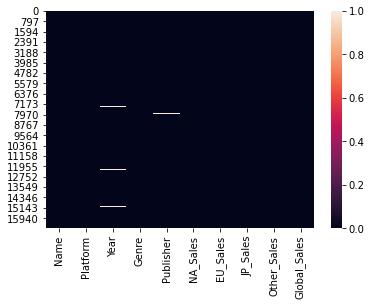

(16719, 10) 



In [3]:
display(vgames.head())

sns.heatmap(vgames.isnull())
plt.show()

print(vgames.shape, "\n")

plt.show()

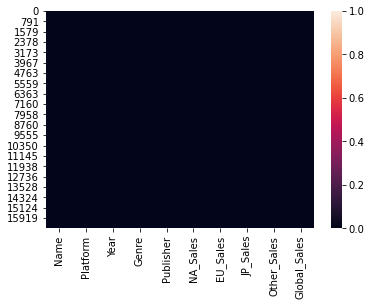

(16418, 10) 



In [4]:
vgames = vgames.dropna(subset=['Publisher','Year'])
sns.heatmap(vgames.isnull())
plt.show()
print(vgames.shape, "\n")

In [5]:
print('row :', vgames.shape[0])
print('column :', vgames.shape[1])
print(vgames.info(),'\n')
print(vgames.describe())

row : 16418
column : 10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16418 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16416 non-null  object 
 1   Platform      16418 non-null  object 
 2   Year          16418 non-null  float64
 3   Genre         16416 non-null  object 
 4   Publisher     16418 non-null  object 
 5   NA_Sales      16418 non-null  float64
 6   EU_Sales      16418 non-null  float64
 7   JP_Sales      16418 non-null  float64
 8   Other_Sales   16418 non-null  float64
 9   Global_Sales  16418 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None 

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16418.000000  16418.000000  16418.000000  16418.000000  16418.000000   
mean    2006.488245      0.264205      0.146048      0.078615      0.047669   
std        5.882674      0.819066      0.507113      0.

In [6]:
publishercol = vgames.drop(columns = ['Year', 'Genre', 'Name','Platform'])
publishersum = publishercol.groupby('Publisher').sum()
publishersum = publishersum.sort_values(by=['Global_Sales'], ascending=False).head(10)
publishersum = publishersum.rename(index={'Electronic Arts':'EA',
                                    'Sony Computer Entertainment': 'Sony',
                                    'Take-Two Interactive': 'Take-Two',
                                    'Konami Digital Entertainment':'Konami',
                                    'Namco Bandai Games':'Namco'})
publishersum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.86,418.58,457.74,94.55,1786.72
EA,588.65,370.02,14.29,126.82,1100.05
Activision,428.92,214.10,6.71,75.27,725.14
Sony,266.17,186.40,74.15,79.62,606.27
Ubisoft,252.12,161.72,7.35,49.09,470.45
Take-Two,222.92,119.06,5.93,55.68,403.58
THQ,207.55,93.66,5.01,31.87,338.11
Konami,88.67,67.93,91.03,29.54,277.36
Sega,107.99,80.08,56.22,23.59,268.11


In [7]:
publishermean = publishersum.drop(columns = 'Global_Sales')
publishermean = publishermean.mean(axis=1) 
publishermean

Publisher
Nintendo      446.6825
EA            274.9450
Activision    181.2500
Sony          151.5850
Ubisoft       117.5700
Take-Two      100.8975
THQ            84.5225
Konami         69.2925
Sega           66.9700
Namco          63.5175
dtype: float64

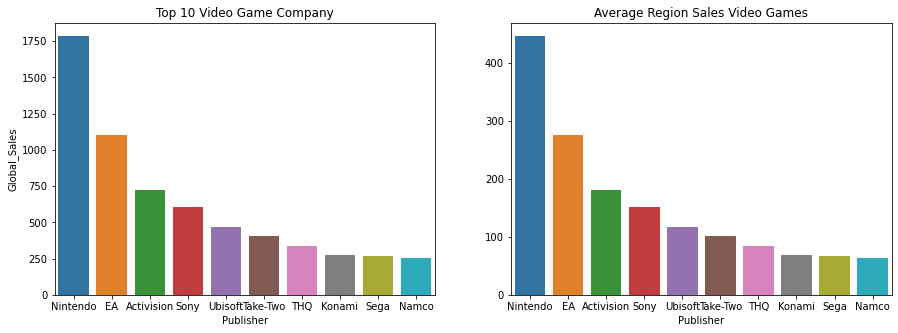

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.barplot(x=publishersum.index, y=publishersum['Global_Sales'], ax=ax[0])
# sns.set_style("whitegrid")
ax[0].set_title('Top 10 Video Game Company')

sns.barplot(x=publishermean.index, y=publishermean, ax=ax[1])
# sns.set_style("darkgrid")
ax[1].set_title('Average Region Sales Video Games')
plt.show()

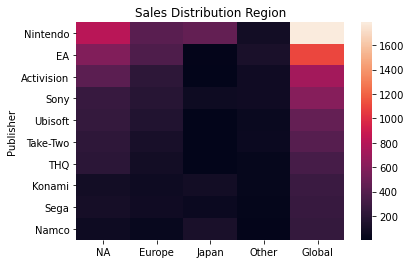

In [9]:
publisherheatmap = publishersum.rename(columns={'NA_Sales':'NA',
                                    'EU_Sales': 'Europe',
                                    'JP_Sales': 'Japan',
                                    'Other_Sales':'Other',
                                    'Global_Sales':'Global'})
sns.heatmap(publisherheatmap)
plt.title('Sales Distribution Region')
plt.show()

In [10]:
genre = vgames.drop(columns = ['Year','Name','Platform','Publisher'])
genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,41.36,28.96,3.77,8.45,82.53
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.68,12.76,3.79,3.29,35.52
3,Sports,15.61,10.93,3.28,2.95,32.77
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01
16715,Sports,0.00,0.01,0.00,0.00,0.01
16716,Adventure,0.00,0.00,0.01,0.00,0.01
16717,Platform,0.01,0.00,0.00,0.00,0.01


In [11]:
genrecounts = genre.groupby('Genre').count()
genrecounts = genrecounts.rename(index={'Role-Playing':'Roleplay'})
genrecounts = genrecounts.sort_values('NA_Sales', ascending=False)
genrecounts

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,3307,3307,3307,3307,3307
Sports,2306,2306,2306,2306,2306
Misc,1697,1697,1697,1697,1697
Roleplay,1483,1483,1483,1483,1483
Shooter,1296,1296,1296,1296,1296
Adventure,1291,1291,1291,1291,1291
Racing,1225,1225,1225,1225,1225
Platform,878,878,878,878,878
Simulation,855,855,855,855,855


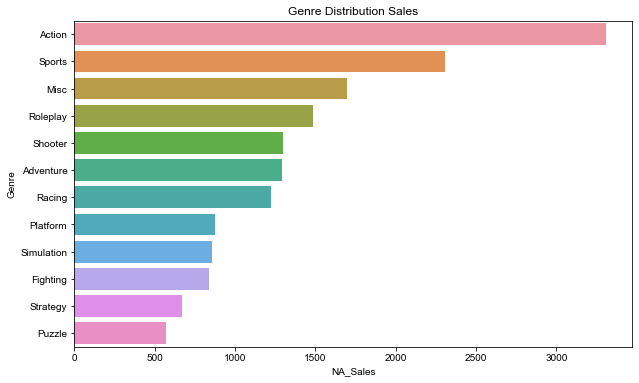

In [12]:
plt.figure(figsize=(10,6))
plt.title("Genre Distribution Sales")
sns.barplot(x=genrecounts['NA_Sales'], y=genrecounts.index)
sns.set_style("darkgrid")

In [13]:
yeargrowth = vgames.drop(columns = ['Genre', 'Name','Platform','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
yeargrowth

,Year,Publisher,Global_Sales
0,2006.0,Nintendo,82.53
1,1985.0,Nintendo,40.24
2,2008.0,Nintendo,35.52
3,2009.0,Nintendo,32.77
4,1996.0,Nintendo,31.37
...,...,...,...
16714,2016.0,Tecmo Koei,0.01
16715,2006.0,Codemasters,0.01
16716,2016.0,Idea Factory,0.01
16717,2003.0,Wanadoo,0.01


Text(0.5, 1.0, 'Sony Sales Growth')

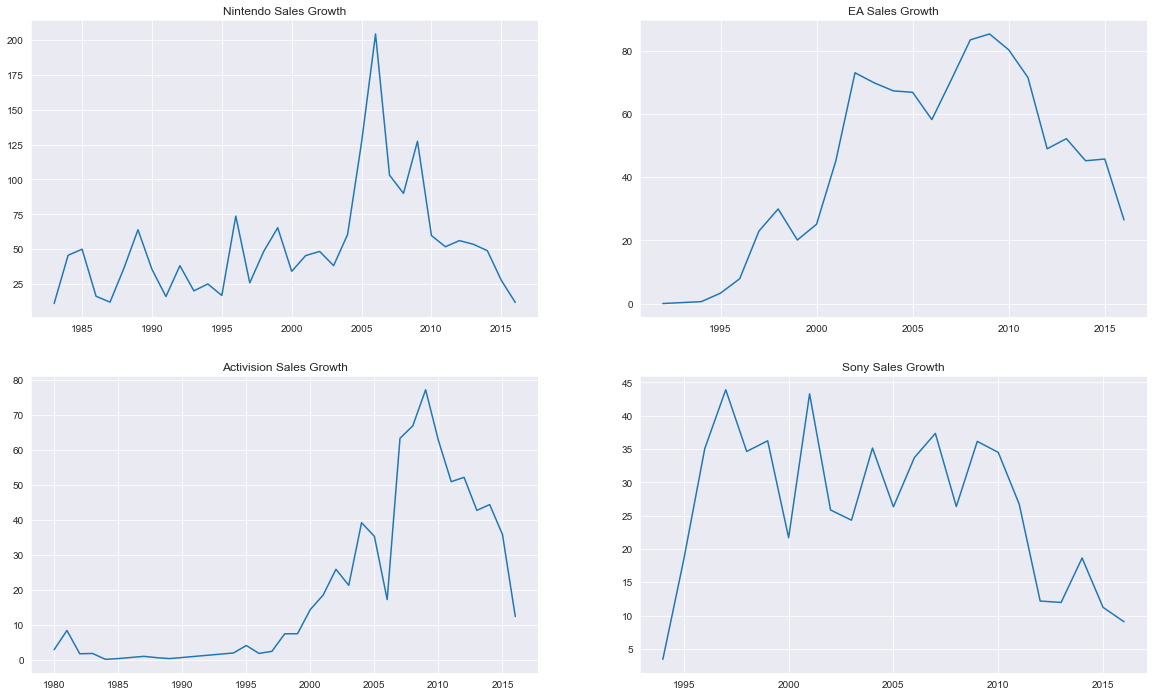

In [14]:
nintendogrow = yeargrowth[yeargrowth['Publisher'] == 'Nintendo']
eagrow = yeargrowth[yeargrowth['Publisher'] == 'Electronic Arts']
activisiongrow = yeargrowth[yeargrowth['Publisher'] == 'Activision']
sonygrow = yeargrowth[yeargrowth['Publisher'] == 'Sony Computer Entertainment']
fig, ax = plt.subplots(2,2,figsize=(20,12))

nintendogrow = nintendogrow.groupby('Year').sum()
eagrow = eagrow.groupby('Year').sum()
activisiongrow = activisiongrow.groupby('Year').sum()
sonygrow = sonygrow.groupby('Year').sum()

ax[0,0].plot(nintendogrow)
ax[0,0].set_title('Nintendo Sales Growth')

ax[0,1].plot(eagrow)
ax[0,1].set_title('EA Sales Growth')

ax[1,0].plot(activisiongrow)
ax[1,0].set_title('Activision Sales Growth')

ax[1,1].plot(sonygrow)
ax[1,1].set_title('Sony Sales Growth')

In [15]:
platform = vgames.drop(columns = ['Genre', 'Name','Year','Publisher','NA_Sales','EU_Sales', 'JP_Sales','NA_Sales', 'Other_Sales'])
platform = platform.groupby('Platform').count()
platform = platform.sort_values('Global_Sales', ascending=False)
platform = platform.head(10)
# platform = platform['Platform'].value_counts()
# platform = platform.head(10)
platform 

,Global_Sales
Platform,
PS2,2127
DS,2122
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,952
XB,803


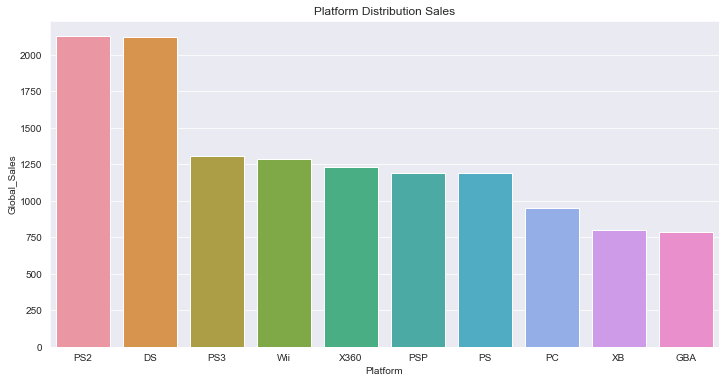

In [16]:
plt.figure(figsize=(12,6))
plt.title("Platform Distribution Sales")
diverging_colors = sns.color_palette("hls", 8)
sns.set_palette(diverging_colors)
sns.barplot(x=platform.index, y=platform['Global_Sales'])